<a href="https://colab.research.google.com/github/SGhuman123/Data-Science-Portfolio/blob/main/Udemy%20TensorFlow%20Developer%20Certificate%20Bootcamp/Section%202%20Neural%20Network%20Classification/02_Exercise_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural network classification with TensorFlow Exercise
1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it? - DONE
2. Replicate the model pictured in the [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data. - DONE
3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy. - DONE
4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: [see the classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

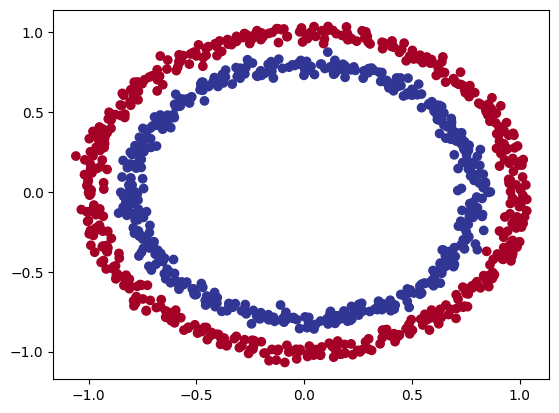

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.15.0'

## 2. Replicate the model pictured in the [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data. - DONE

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(2)
])


# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 5s 10ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 2/250
32/32 [==============================] - 0s 9ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 4/250
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 5/250
32/32 [==============================] - 0s 12ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 6/250
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.4930
Epoch 1

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.4930


[7.712474346160889, 0.49300000071525574]

## 3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0, random_state=42)

In [ ]:
# Check out features
X[:10]

array([[ 1.51839257, -0.35514276],
       [ 0.01844084,  0.30884137],
       [ 0.71547241, -0.45866785],
       [-0.96729486,  0.25365458],
       [-0.94905575,  0.31510822],
       [-0.80141362,  0.59811053],
       [ 0.1595999 ,  0.98718178],
       [ 1.34536505, -0.43846842],
       [ 0.80141362,  0.59811053],
       [ 1.        ,  0.        ]])

In [ ]:
# Check out labels
y[:10]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

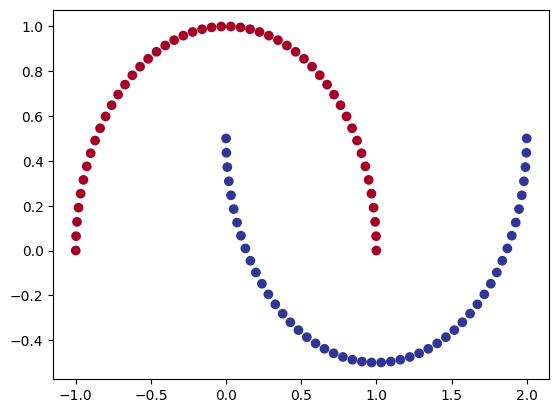

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation="relu"),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=40)

Epoch 1/40
4/4 [==============================] - 0s 5ms/step - loss: 3.5670 - accuracy: 0.6200
Epoch 2/40
4/4 [==============================] - 0s 5ms/step - loss: 2.2222 - accuracy: 0.7500
Epoch 3/40
4/4 [==============================] - 0s 4ms/step - loss: 1.2275 - accuracy: 0.8100
Epoch 4/40
4/4 [==============================] - 0s 4ms/step - loss: 0.7714 - accuracy: 0.8100
Epoch 5/40
4/4 [==============================] - 0s 4ms/step - loss: 0.7924 - accuracy: 0.8400
Epoch 6/40
4/4 [==============================] - 0s 4ms/step - loss: 0.8341 - accuracy: 0.8500
Epoch 7/40
4/4 [==============================] - 0s 4ms/step - loss: 0.7074 - accuracy: 0.8600
Epoch 8/40
4/4 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.8700
Epoch 9/40
4/4 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.8600
Epoch 10/40
4/4 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.8700
Epoch 11/40
4/4 [======================

In [ ]:
model_2.evaluate(X, y)

4/4 [==============================] - 0s 4ms/step - loss: 0.2849 - accuracy: 0.8700


[0.2849099040031433, 0.8700000047683716]

## 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

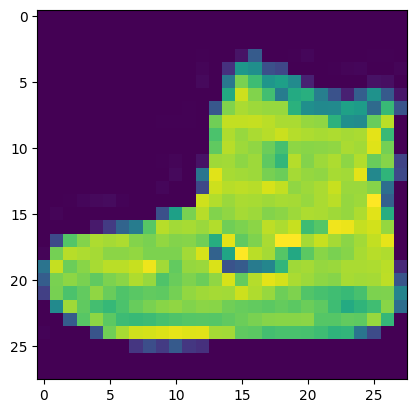

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Shirt')

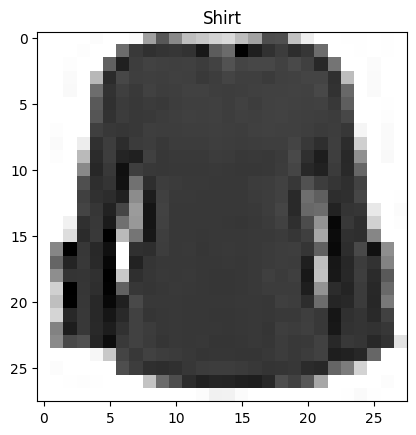

In [ ]:
# Plot an example image and its label
index_of_choice = 8888
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                 metrics=["accuracy"])

# Fit the model
model_3.fit(train_data_norm,
            train_labels,
            epochs=30,
            validation_data=(test_data_norm, test_labels))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5711 - accuracy: 0.7990 - val_loss: 0.4502 - val_accuracy: 0.8436
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4082 - accuracy: 0.8541 - val_loss: 0.4838 - val_accuracy: 0.8376
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3698 - accuracy: 0.8671 - val_loss: 0.4116 - val_accuracy: 0.8499
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3485 - accuracy: 0.8739 - val_loss: 0.4047 - val_accuracy: 0.8539
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3333 - accuracy: 0.8779 - val_loss: 0.3855 - val_accuracy: 0.8640
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3204 - accuracy: 0.8831 - val_loss: 0.3978 - val_accuracy: 0.8552
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3110 - accuracy: 0.8860 - val_loss: 0.4019 - val_accuracy:

In [ ]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max()+ cm.min()) / 2,

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Make some predictions with our model
y_probs = model_3.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[7.00760006e-11, 2.86126071e-11, 1.07527411e-10, 7.48910452e-07,
        1.43691198e-10, 2.65052164e-04, 5.27917189e-11, 6.88955304e-04,
        4.07040775e-13, 9.99045193e-01],
       [5.62571891e-08, 6.72503504e-18, 9.99768019e-01, 8.95990542e-18,
        2.25149750e-04, 4.32822508e-22, 6.80285075e-06, 3.48586849e-26,
        4.05888257e-12, 1.10151976e-32],
       [4.84769447e-10, 9.99999940e-01, 2.05760241e-13, 8.70374172e-12,
        8.56390374e-15, 1.76243837e-18, 3.47458390e-13, 1.00600879e-19,
        1.13305645e-17, 2.75617541e-14],
       [4.88312111e-08, 9.99999940e-01, 1.02755110e-10, 1.65995075e-08,
        4.87856847e-12, 1.18869744e-13, 9.57824930e-11, 2.34513595e-17,
        1.39822778e-14, 3.35582361e-11],
       [1.94354072e-01, 3.52047003e-10, 1.15286733e-03, 3.30827356e-06,
        9.75504881e-05, 1.23071803e-10, 8.04369986e-01, 3.91342601e-12,
        2.21388727e-05, 4.17977344e-15]], dtype=float32)

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

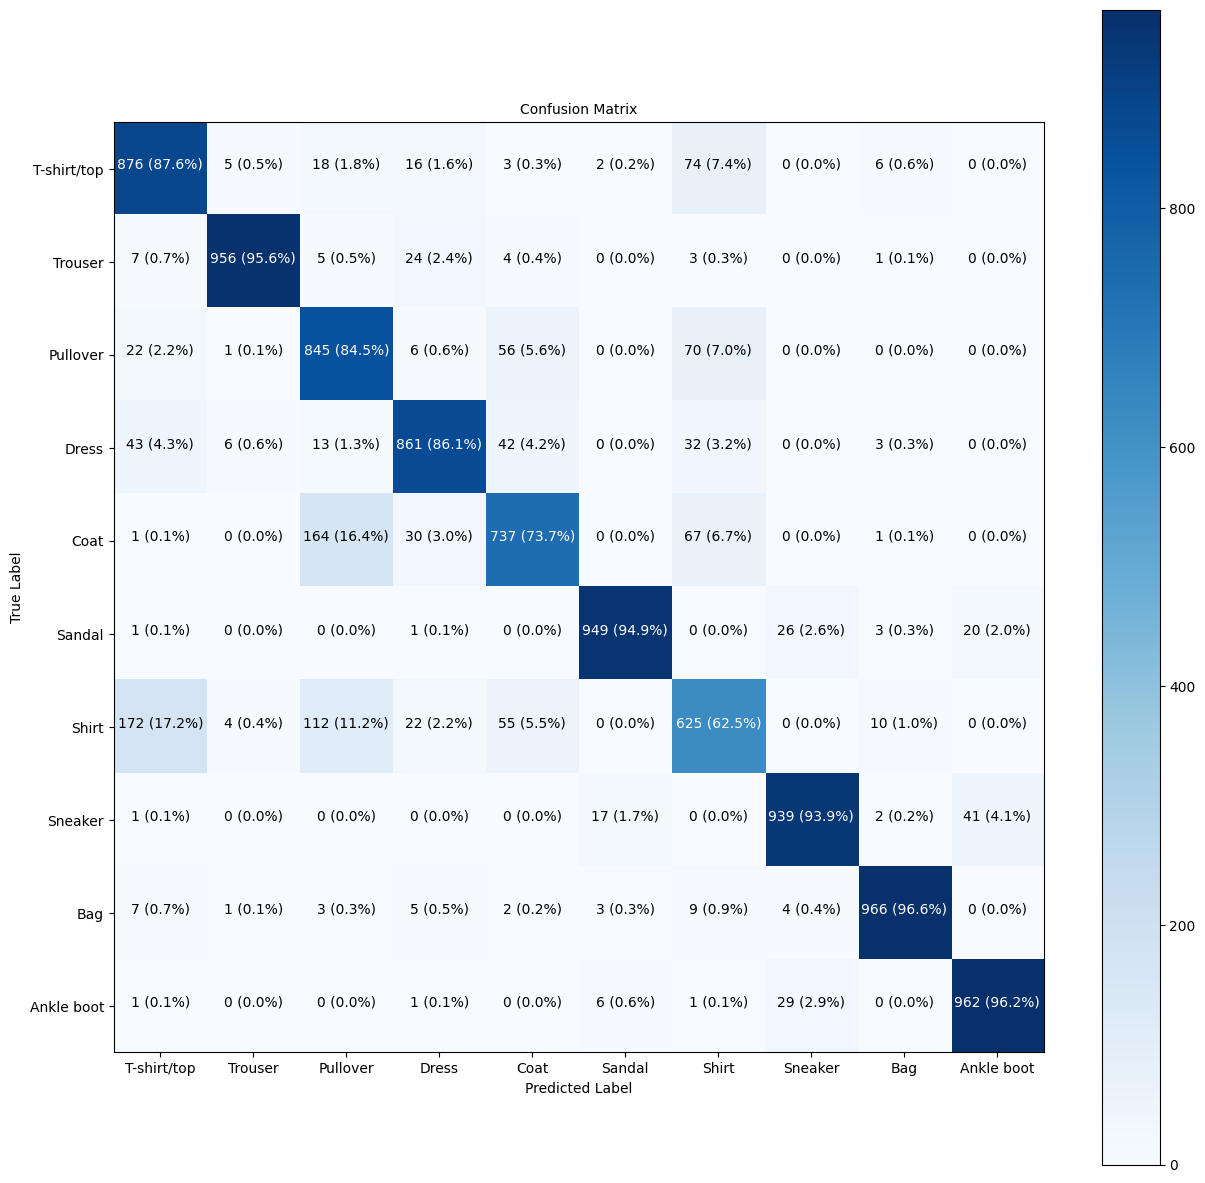

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

## 5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

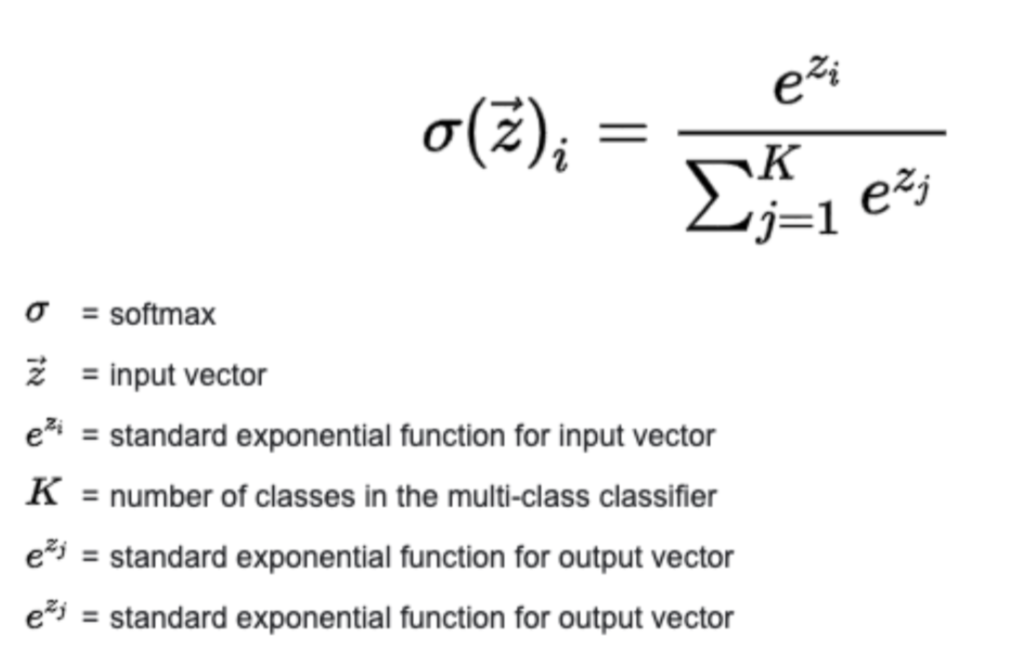

In [ ]:
# Implementing a softmax function
def softmax(x):
  '''
  Argument:
  x --> Accepts a tensor of any shape

  Returns:
  --> softmax activations of the input tensor
  '''
  x = tf.cast(x , dtype = tf.float32) # to tackle the data type error of int32 / int64

  # Below is the forumale
  e_x = tf.math.exp(x - tf.math.reduce_max(x))
  return e_x / tf.math.reduce_sum(e_x , axis = 0)

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)

tensor = tf.constant([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]] )
tensor

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 6],
       [2, 4, 5, 6],
       [3, 8, 7, 6]], dtype=int32)>

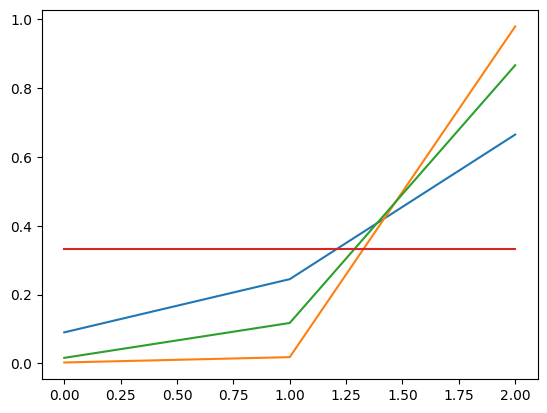

In [ ]:
plt.plot(softmax(tensor));

## 6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: [see the classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.


In [ ]:
y_probs

array([[7.00760006e-11, 2.86126071e-11, 1.07527411e-10, ...,
        6.88955304e-04, 4.07040775e-13, 9.99045193e-01],
       [5.62571891e-08, 6.72503504e-18, 9.99768019e-01, ...,
        3.48586849e-26, 4.05888257e-12, 1.10151976e-32],
       [4.84769447e-10, 9.99999940e-01, 2.05760241e-13, ...,
        1.00600879e-19, 1.13305645e-17, 2.75617541e-14],
       ...,
       [4.60530719e-04, 2.06237891e-11, 5.22301489e-05, ...,
        4.14914695e-16, 9.99460578e-01, 8.98963512e-18],
       [1.50165260e-06, 9.99970138e-01, 1.52162201e-07, ...,
        6.94515732e-18, 6.11735862e-09, 1.26480815e-09],
       [3.53096902e-06, 5.19458174e-13, 2.81754467e-07, ...,
        2.63075890e-06, 3.76120552e-05, 2.07190176e-09]], dtype=float32)

In [ ]:
# First prediction
index = 42
print(y_probs[index])
print(f"Max value (probability of prediction): {np.max(y_probs[index])}")
print(f"Sum: {np.sum(y_probs[index])}")
print(f"Max index: {np.argmax(y_probs[index])}")
print(f"Predicted label: {class_names[np.argmax(y_probs[index])]}")

[1.7812186e-01 4.3179910e-03 4.9022990e-03 2.8434789e-01 2.9318085e-02
 4.8542220e-10 4.9881995e-01 9.5672983e-12 1.7189710e-04 1.9082540e-13]
Max value (probability of prediction): 0.4988199472427368
Sum: 1.0
Max index: 6
Predicted label: Shirt


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(len(test_labels))
print(len(train_labels))
print(len(y_probs))
print(train_labels)

10000
60000
10000
[9 0 0 ... 3 0 5]


In [ ]:
len(class_names)

10

In [ ]:
# Plot multiple random images of fashion MNIST
import random
import matplotlib.pyplot as plt

def multiple_images():
  # plt.figure(figsize=(7, 7))
  i_multiplier = 20
  num_rows = 3
  num_cols = 2
  num_images = num_rows*num_cols
  plt.figure(figsize=(10*num_cols, 5*num_rows))
  for i in range(3):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)

    # ax = plt.subplot(2, 2, i+1)

    rand_index = random.choice(range(len(test_data_norm)))

    pred_prob, true_label = np.max(y_probs[rand_index]), class_names[test_labels[rand_index]]
    pred_label = class_names[np.argmax(y_probs[rand_index])]
    # print(pred_label, true_label)

    # Change the colour of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Find the top 10 prediction confidence index
    top_10_pred_indexes = y_probs[rand_index].argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = y_probs[rand_index][top_10_pred_indexes]
    # print(top_10_pred_indexes)
    # Find the top 10 prediction labels
    # top_10_pred_labels = class_names[top_10_pred_indexes]
    top_10_pred_labels = [class_names[j] for j in top_10_pred_indexes]


    plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
              color=color)
    plt.axis(False)


    # Setup plot
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                      top_10_pred_values,
                      color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")

    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
      top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
      pass

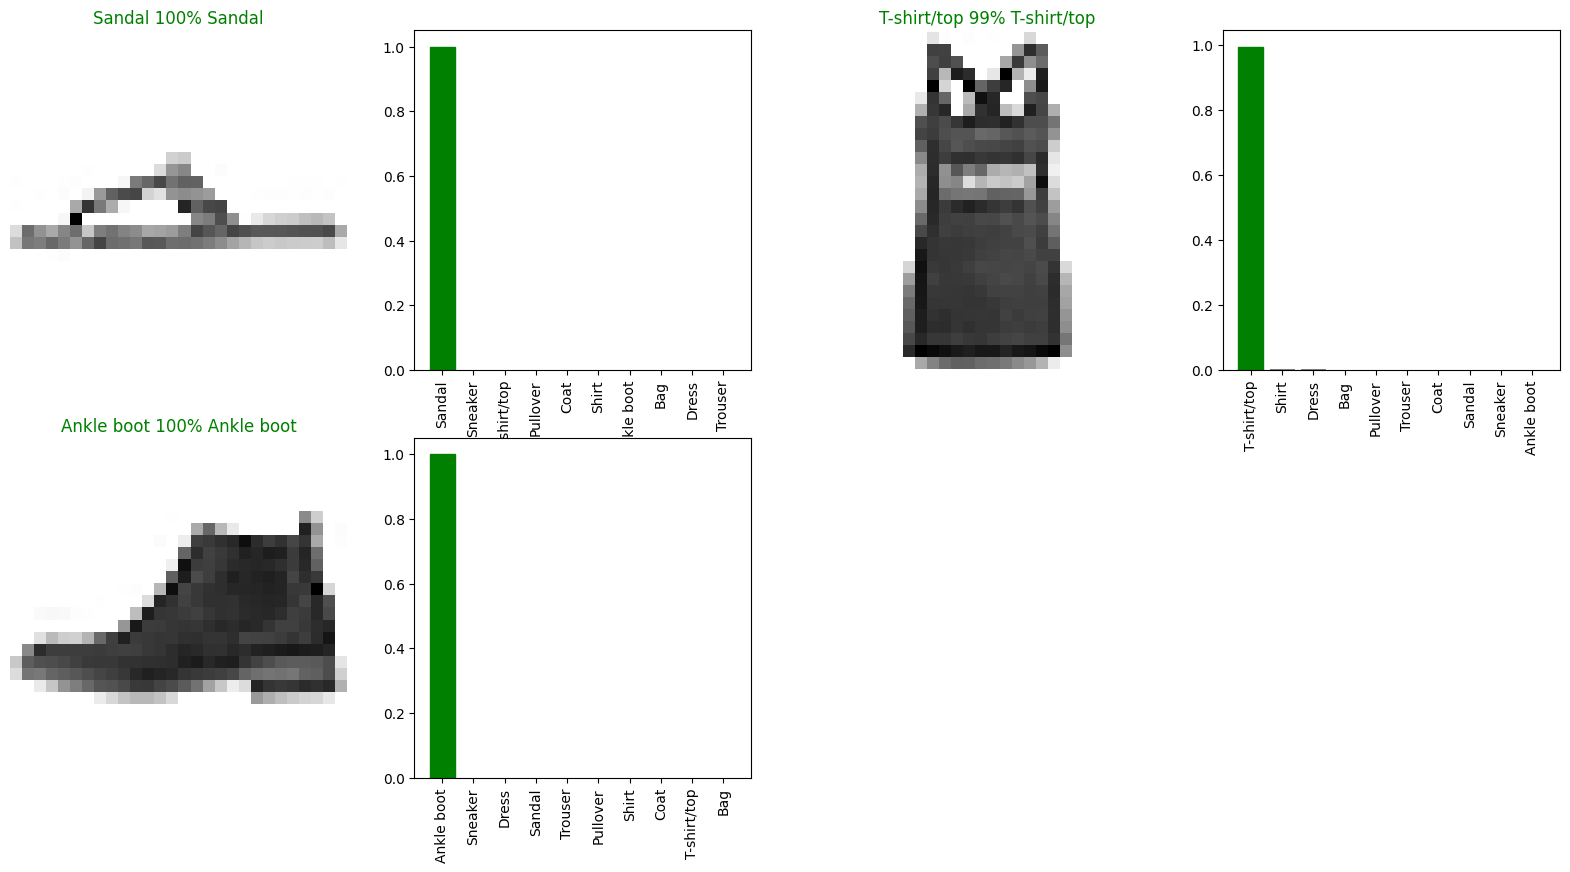

In [ ]:
multiple_images()

## 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
labels = [num for num in range(0, 10)]
class_dict = {class_names[i]: labels[i] for i in range(len(labels))}
class_dict

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
len(train_labels), len(train_data)

(60000, 60000)

In [ ]:
# indices = [i for i in range(len(my_list)) if my_list[i] == item]

In [ ]:
# Plot multiple random images of fashion MNIST
import random
import matplotlib.pyplot as plt

def multiple_images_of_a_class(type_of_image):
  type_of_image_index = class_dict[type_of_image]
  # plt.figure(figsize=(7, 7))
  item = class_dict[type_of_image]
  indices = [i for i in range(len(test_labels)) if test_labels[i] == item]

  i_multiplier = 20
  num_rows = 3
  num_cols = 2
  num_images = num_rows*num_cols
  plt.figure(figsize=(10*num_cols, 5*num_rows))

  for i in range(3):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    # ax = plt.subplot(2, 2, i+1)

    rand_index = random.choice(indices)

    pred_prob, true_label = np.max(y_probs[rand_index]), class_names[test_labels[rand_index]]
    pred_label = class_names[np.argmax(y_probs[rand_index])]

    # Change the colour of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Find the top 10 prediction confidence index
    top_10_pred_indexes = y_probs[rand_index].argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = y_probs[rand_index][top_10_pred_indexes]
    # print(top_10_pred_indexes)
    # Find the top 10 prediction labels
    # top_10_pred_labels = class_names[top_10_pred_indexes]
    top_10_pred_labels = [class_names[j] for j in top_10_pred_indexes]


    plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
              color=color)
    plt.axis(False)


    # Setup plot
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                      top_10_pred_values,
                      color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")

    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
      top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
      pass

    # plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
    # plt.title(class_names[test_labels[rand_index]])
    # plt.axis(False)

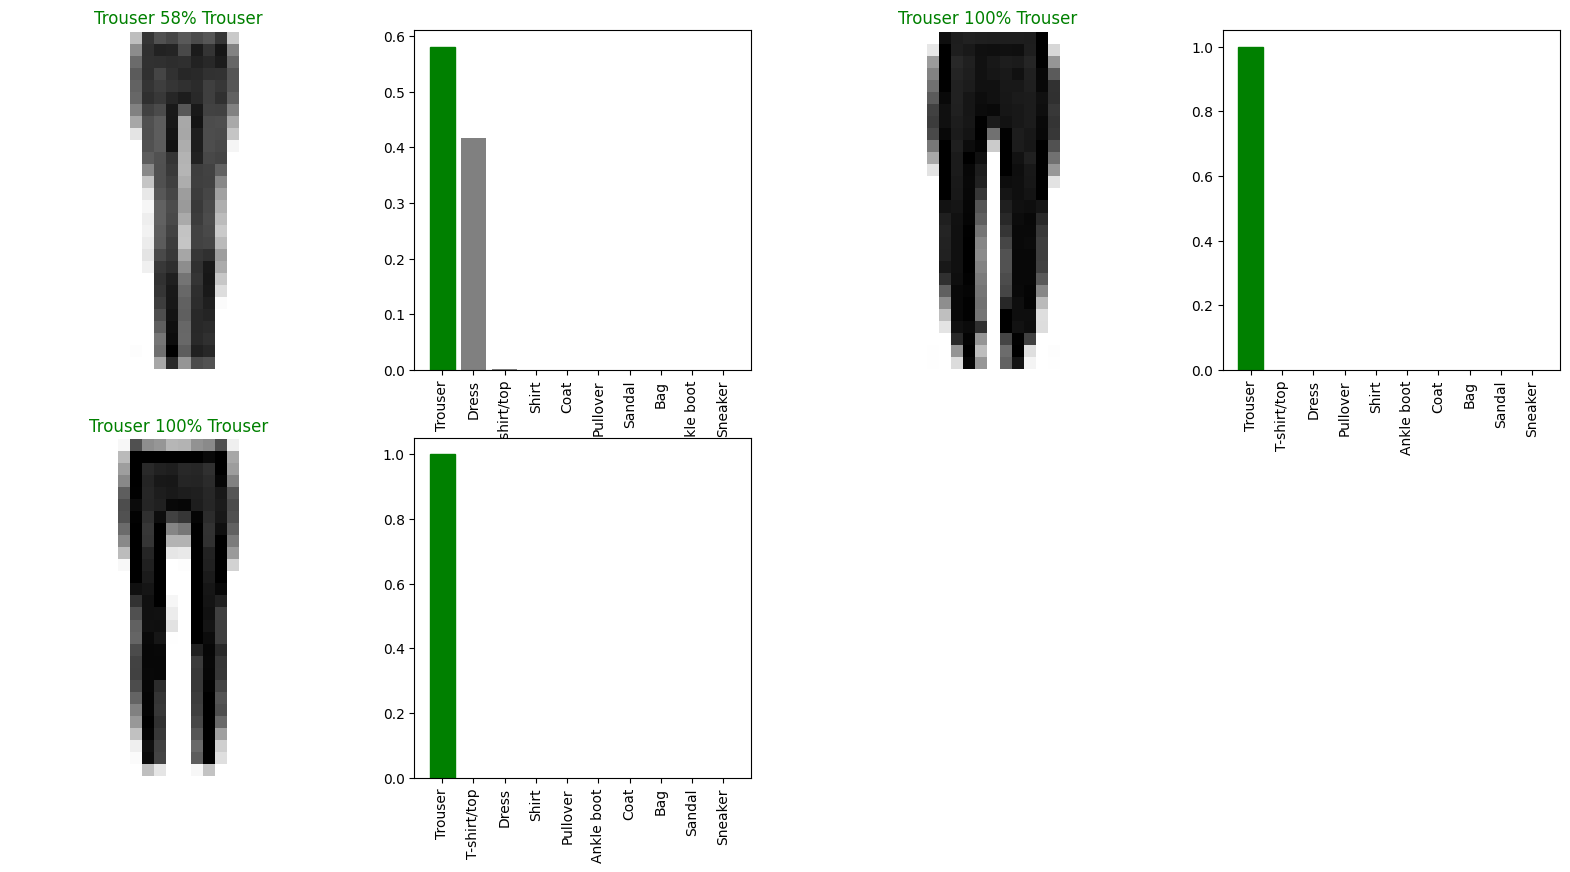

In [ ]:
multiple_images_of_a_class("Trouser")